In [ ]:
#Loading the Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

In [ ]:
# Load Data
data = pd.read_excel('UAN Inputs.xlsx', sheet_name='Sheet1')

In [ ]:
data.head()

,date,UAN32_NOLA,Ammonia_4Week_EMA,UAN_BalticSea,Ethanol,Coal,DutchNatGas_4WkMA,Urea_Midwest
0,2015-01-22,265.0,625.314109,235.0,1.4167,58.60,6.798264,373.0
1,2015-01-29,265.0,627.188465,238.0,1.4000,58.85,6.681299,373.0
2,2015-02-05,264.0,620.313079,240.0,1.4390,60.80,6.757492,373.0
3,2015-02-12,264.0,615.387848,252.0,1.4000,62.75,7.035990,373.0
4,2015-02-19,264.0,612.432709,252.0,1.3950,62.00,7.263622,365.0


In [ ]:
# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [ ]:
# Select target variable and regressors
y = data['UAN32_NOLA']
X = data[['Ammonia_4Week_EMA', 'UAN_BalticSea', 'Ethanol', 'Coal', 'DutchNatGas_4WkMA', 'Urea_Midwest']]

Important Part

In [ ]:
# prompt: check for missing values

# Check for missing values in the target variable and regressors
print(y.isnull().sum())
print(X.isnull().sum())
# Fill missing values (example using forward fill)
y = y.fillna(method='ffill')
X = X.fillna(method='ffill')
#Alternative: fill missing values with mean
#y = y.fillna(y.mean())
#X = X.fillna(X.mean())

#Verify that there are no more missing values
print(y.isnull().sum())
print(X.isnull().sum())


0
Ammonia_4Week_EMA    0
UAN_BalticSea        0
Ethanol              0
Coal                 0
DutchNatGas_4WkMA    0
Urea_Midwest         0
dtype: int64
0
Ammonia_4Week_EMA    0
UAN_BalticSea        0
Ethanol              0
Coal                 0
DutchNatGas_4WkMA    0
Urea_Midwest         0
dtype: int64


<ipython-input-10-e9fe7337f9a9>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')
<ipython-input-10-e9fe7337f9a9>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


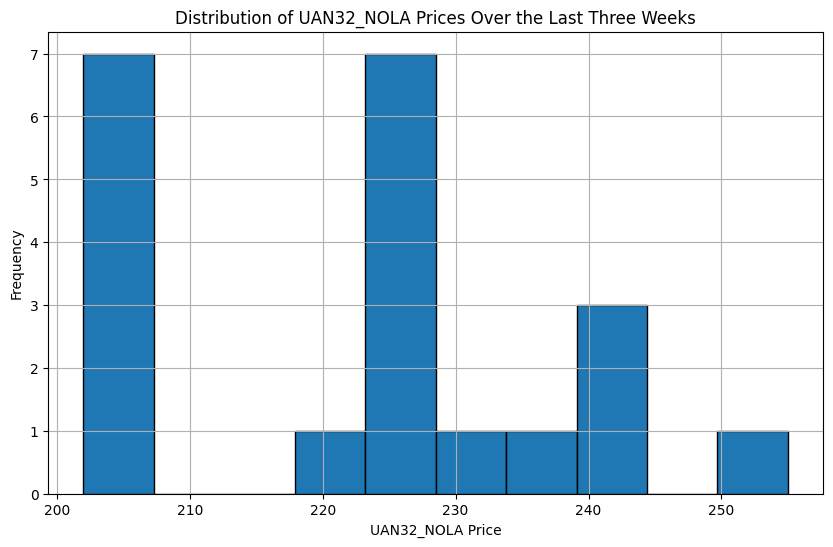

count     21.000000
mean     221.666667
std       15.710930
min      202.000000
25%      205.000000
50%      225.000000
75%      230.000000
max      255.000000
Name: UAN32_NOLA, dtype: float64


In [ ]:
# prompt: distribution of last three weeks

# Assuming 'y' is your time series data with a DateTimeIndex
last_three_weeks = y.tail(21)  # Assuming weekly data, adjust if different

# Plotting the distribution (histogram)
plt.figure(figsize=(10, 6))
plt.hist(last_three_weeks, bins=10, edgecolor='black') # Adjust bins as needed
plt.title('Distribution of UAN32_NOLA Prices Over the Last Three Weeks')
plt.xlabel('UAN32_NOLA Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Displaying descriptive statistics
print(last_three_weeks.describe())

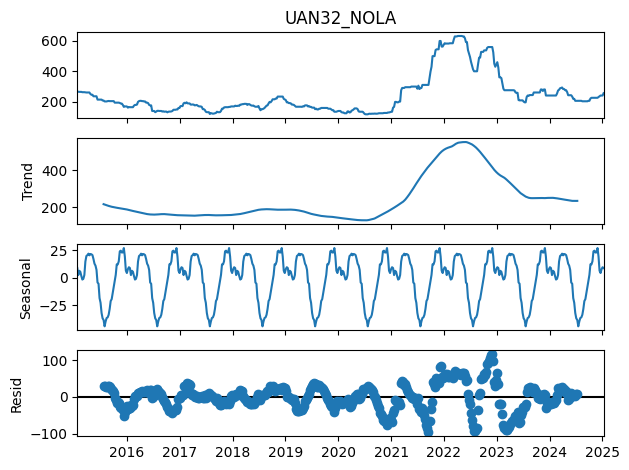

In [ ]:
# prompt: do the seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'y' is your time series data with a DateTimeIndex
result = seasonal_decompose(y, model='additive') # or 'multiplicative'

# Plot the decomposition
result.plot()
plt.show()

In [ ]:
# prompt: how to difference?

# ... (your existing code)

# Stationarity Check using ADF test
adf_result = adfuller(y)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Difference the series if non-stationary
if adf_result[1] > 0.05:
    print("The series is non-stationary; differencing is required.")
    y_diff = y.diff().dropna()

    # Check stationarity of the differenced series
    adf_result_diff = adfuller(y_diff)
    print(f'ADF Statistic (Differenced): {adf_result_diff[0]}')
    print(f'p-value (Differenced): {adf_result_diff[1]}')

    if adf_result_diff[1] <= 0.05:
        print("The differenced series is stationary.")
        y = y_diff #Now use y_diff for further analysis as it's the stationary version
    else:
        print("The differenced series is still non-stationary. Consider further differencing or transformations.")

else:
    print("The series is stationary.")

# ... (rest of your code, now using the potentially differenced 'y')

ADF Statistic: -2.222125403991012
p-value: 0.1983134285216842
The series is non-stationary; differencing is required.
ADF Statistic (Differenced): -4.873449340383608
p-value (Differenced): 3.927082425161712e-05
The differenced series is stationary.


In [ ]:
# Stationarity Check using ADF test
adf_result = adfuller(y)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
if adf_result[1] > 0.05:
    print("The series is non-stationary; differencing is required.")
    y_diff = y.diff().dropna()
else:
    print("The series is stationary.")

ADF Statistic: -4.873449340383608
p-value: 3.927082425161712e-05
The series is stationary.


In [ ]:
# KPSS Test for confirmation
kpss_statistic, p_value, lags, critical_values = kpss(y)
print(f'KPSS Statistic: {kpss_statistic}, p-value: {p_value}')
if p_value < 0.05:
    print("The series is non-stationary according to KPSS.")
else:
    print("The series is stationary according to KPSS.")

KPSS Statistic: 0.08232933785039045, p-value: 0.1
The series is stationary according to KPSS.


<ipython-input-15-bb90942389fe>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_statistic, p_value, lags, critical_values = kpss(y)


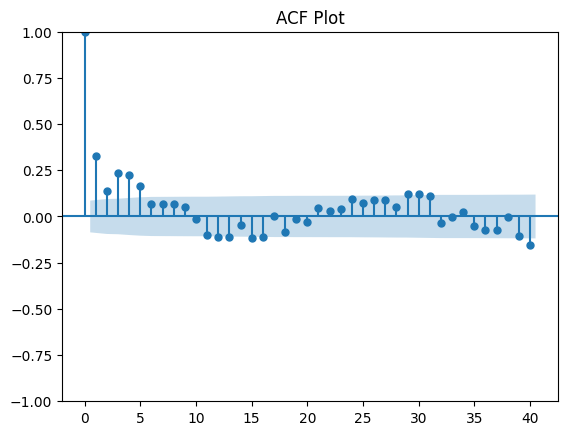

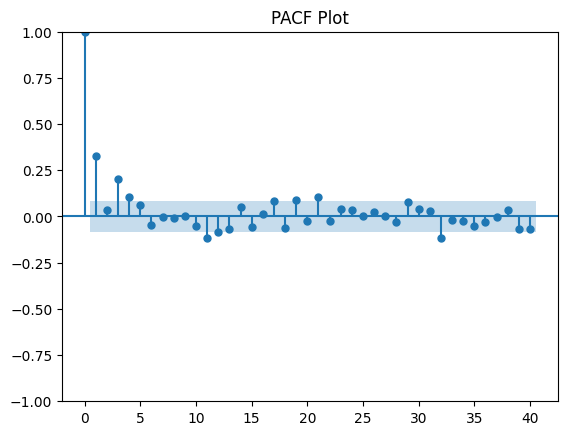

In [ ]:
# Plotting ACF and PACF for seasonality check
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y, lags=40)
plt.title('ACF Plot')
plt.show()

plot_pacf(y, lags=40)
plt.title('PACF Plot')
plt.show()

In [ ]:
# prompt: SarimaX hyperparameters
# SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous regressors) is a type of statistical model used for forecasting time series data. It is an extension of the standard SARIMA model that includes the ability to incorporate additional exogenous variables (also known as explanatory variables or regressors) into the model.
# There are several hyperparameters that need to be specified when fitting a SARIMAX model. These include:
# p: The order of the autoregressive (AR) component of the model. This is the number of lagged values of the time series used to predict the current value.
# d: The order of differencing. This is the number of times the time series needs to be differenced in order to make it stationary.
# q: The order of the moving average (MA) component of the model. This is the number of lagged forecast errors used to predict the current value.
# P: The order of the seasonal autoregressive component of the model. This is the number of lagged values of the time series used to predict the current value, with a lag equal to the seasonal period.
# D: The order of seasonal differencing. This is the number of times the time series needs to be differenced in order to make it stationary, with a lag equal to the seasonal period.
# Q: The order of the seasonal moving average component of the model. This is the number of lagged forecast errors used to predict the current value, with a lag equal to the seasonal period.
# m: The number of periods in a season. This is the number of time steps that make up a seasonal period.
# In addition to these parameters, you may also need to specify the number of exogenous variables and the values of any hyperparameters related to those variables, such as the order of their autoregressive or moving average components.
# Optimizing these hyperparameters is an important part of fitting a SARIMAX model, as the correct values can have a significant impact on the accuracy of the model. This can be done using tech

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

# ... (your existing code)

# Define the p, d, q, P, D, Q ranges for SARIMAX
p = range(0, 3)  # Example: 0 to 2
d = range(0, 2)  # Example: 0 to 1
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
m = 4 # Example: Seasonal period is 4, adjust as needed.
# Generate all different combinations of parameters
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(product(P, D, Q))]

# Initialize best parameters and AIC
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

# Iterate through all possible parameter combinations
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y,
                          order=param,
                          seasonal_order=param_seasonal,
                          exog=X,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except Exception as e:
            print(f"Error fitting model with parameters {param} and {param_seasonal}: {e}")
            continue


print("Best SARIMAX parameters found:")
print(f"pdq: {best_pdq}, seasonal_pdq: {best_seasonal_pdq}")

# Now you can fit the model with the best parameters
best_model = SARIMAX(y,
                    order=best_pdq,
                    seasonal_order=best_seasonal_pdq,
                    exog=X,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

best_results = best_model.fit()
print(best_results.summary())

Error fitting model with parameters (0, 0, 0) and (0, 0, 0, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (0, 0, 1, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (0, 1, 0, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (0, 1, 1, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (1, 0, 0, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (1, 0, 1, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (1, 1, 0, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 0) and (1, 1, 1, 4): The indices for endog and exog are not aligned
Error fitting model with parameters (0, 0, 1) and (0, 0, 0, 4): The indices for endog and exog are not aligned
E

ValueError: The indices for endog and exog are not aligned

In [ ]:
# Fit SARIMAX model (example with p=1, d=1, q=1, P=1, D=1, Q=1, s=52 for weekly seasonality)
# Reset index of X to match the differenced y
X = X.reindex(y.index)  # Align the index of X to the potentially differenced y
model = SARIMAX(y, exog=X, order=(1, 0, 2), seasonal_order=(0, 1, 1, 4))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          UAN32_NOLA   No. Observations:                  521
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 4)   Log Likelihood               -1900.732
Date:                             Wed, 15 Jan 2025   AIC                           3823.465
Time:                                     20:07:32   BIC                           3870.193
Sample:                                 01-22-2015   HQIC                          3841.774
                                      - 01-09-2025                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Ammonia_4Week_EMA     0.3065      0.012     25.810      0.000       0.283       0.330
UAN_Ba

In [ ]:
# Forecasting the next 12 weeks (assuming future values for X are known)
future_X = pd.DataFrame({
    'Ammonia_4Week_EMA': [value1]*12,
    'UAN_BalticSea': [value2]*12,
    'Ethanol': [value3]*12,
    'Coal': [value4]*12,
    'DutchNatGas_4WkMA': [value5]*12,
    'Urea_Midwest': [value6]*12,
}, index=pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12))

In [ ]:
forecast = model_fit.forecast(steps=12, exog=future_X)
print(f'Forecast for next 12 weeks:\n{forecast}')

Forecast for next 12 weeks:
2025-01-16    255.137846
2025-01-23    253.328065
2025-01-30    253.205480
2025-02-06    251.944757
2025-02-13    251.678112
2025-02-20    252.250909
2025-02-27    252.208658
2025-03-06    251.022278
2025-03-13    250.824430
2025-03-20    251.460895
2025-03-27    251.477563
2025-04-03    250.345707
Freq: W-THU, Name: predicted_mean, dtype: float64


In [ ]:
# Performance evaluation on training data (if split)
train_size = int(len(y) * 0.8)
train_y, test_y = y[0:train_size], y[train_size:]
train_X, test_X = X[0:train_size], X[train_size:]

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)

print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Square Error (RMSE): 10.331450591423756
Mean Absolute Error (MAE): 7.146465003505876


Hypothesis
The error message "ValueError: Found input variables with inconsistent numbers of samples: [105, 104]" indicates that the mean_squared_error function is receiving two arrays (test_y and predictions) with different lengths. Specifically, test_y has 105 elements and predictions has 104 elements.

Potential Issue in Data Splitting: The way the data is split into training and testing sets in cell 74 might have resulted in test_y containing an extra data point compared to predictions. In SARIMAX, the forecast method outputs predictions for future time periods that are not included in the test data, resulting in this size mismatch.
Missing predictions: It is possible the predictions variable has not been assigned the output of a SARIMAX forecast step, resulting in it being an empty list.
Conflicting Indices: The indices of test_y and predictions could be misaligned even if they have the same length. This could happen due to dropping or inserting rows in different steps of the analysis.
Suggested Changes

In [ ]:
predictions = model_fit.predict(start=test_y.index[0], end=test_y.index[-1], exog=test_X) # Make predictions on the test set



rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)

print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Square Error (RMSE): 10.331450591423756
Mean Absolute Error (MAE): 7.146465003505876


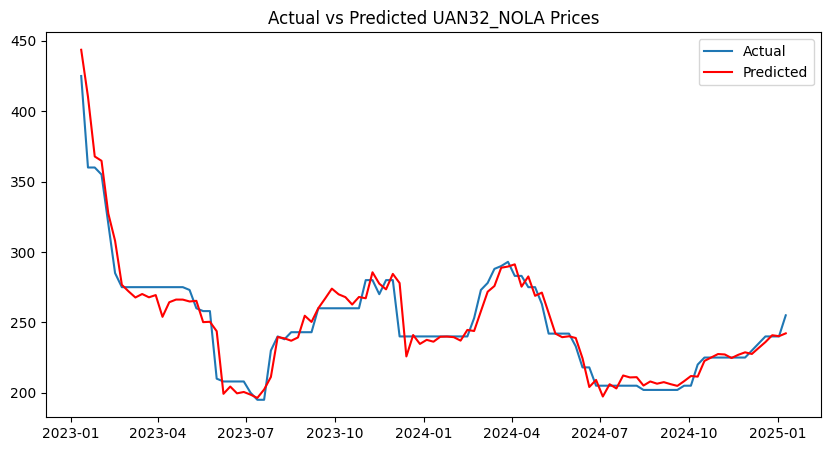

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y.index[-len(test_y):], test_y, label='Actual')
plt.plot(y.index[-len(test_y):], predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted UAN32_NOLA Prices')
plt.legend()
plt.show()

Forecast for next 12 weeks:
2025-01-16    255.137846
2025-01-23    253.328065
2025-01-30    253.205480
2025-02-06    251.944757
2025-02-13    251.678112
2025-02-20    252.250909
2025-02-27    252.208658
2025-03-06    251.022278
2025-03-13    250.824430
2025-03-20    251.460895
2025-03-27    251.477563
2025-04-03    250.345707
Freq: W-THU, Name: predicted_mean, dtype: float64
Root Mean Square Error (RMSE): 10.331450591423756
Mean Absolute Error (MAE): 7.146465003505876


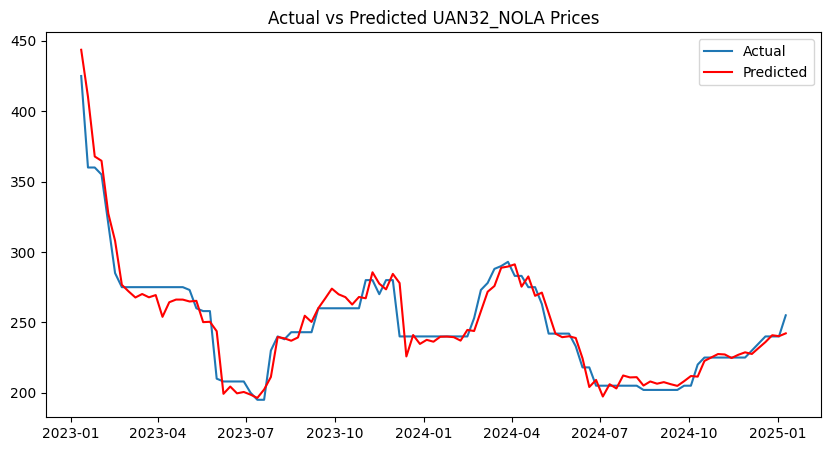

In [ ]:
# prompt: forecast for 12 weeks

from sklearn.metrics import mean_squared_error, mean_absolute_error

# ... (your existing code)

# Forecasting the next 12 weeks (assuming future values for X are known)
# Replace placeholders with actual future values
value1 = X['Ammonia_4Week_EMA'].iloc[-1]  # Or a forecast for Ammonia
value2 = X['UAN_BalticSea'].iloc[-1]
value3 = X['Ethanol'].iloc[-1]
value4 = X['Coal'].iloc[-1]
value5 = X['DutchNatGas_4WkMA'].iloc[-1]
value6 = X['Urea_Midwest'].iloc[-1]


future_X = pd.DataFrame({
    'Ammonia_4Week_EMA': [value1] * 12,
    'UAN_BalticSea': [value2] * 12,
    'Ethanol': [value3] * 12,
    'Coal': [value4] * 12,
    'DutchNatGas_4WkMA': [value5] * 12,
    'Urea_Midwest': [value6] * 12,
}, index=pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12))

forecast = model_fit.forecast(steps=12, exog=future_X)
print(f'Forecast for next 12 weeks:\n{forecast}')

# Performance Evaluation (Corrected)
train_size = int(len(y) * 0.8)
train_y, test_y = y[0:train_size], y[train_size:]
train_X, test_X = X[0:train_size], X[train_size:]

# Ensure the exog data aligns with the test data
test_X = test_X.reindex(test_y.index)  # Correctly aligns the indices

# Make predictions on the test set. Now, the number of predictions will match
predictions = model_fit.predict(start=test_y.index[0], end=test_y.index[-1], exog=test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)

print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_y.index, test_y, label='Actual')  # Corrected x-axis values
plt.plot(test_y.index, predictions, label='Predicted', color='red') # Corrected x-axis values
plt.title('Actual vs Predicted UAN32_NOLA Prices')
plt.legend()
plt.show()

RMSE: 10.331450591423756
MAE: 7.146465003505876
Here's a breakdown of what these values indicate and how to interpret them:

RMSE:

Meaning: RMSE represents the square root of the average of squared differences between your model's predictions and the actual values. It gives a higher weight to larger errors.
Interpretation: Your RMSE of 10.33 suggests that, on average, your model's predictions are off by about 10.33 units from the actual values. The units are the same as your target variable (UAN32_NOLA price in this case).
MAE:

Meaning: MAE represents the average of the absolute differences between your model's predictions and the actual values. It treats all errors equally.
Interpretation: Your MAE of 7.15 suggests that, on average, your model's predictions deviate from the actual values by about 7.15 units.
Comparison and Overall Assessment:

RMSE > MAE (usually): RMSE is typically higher than MAE because it squares the errors, giving more weight to larger deviations.
Model Performance: These error metrics help you assess the accuracy of your forecasting model. Lower values indicate better performance. Whether these values are acceptable depends on the specific context of your problem and the variability of your data.
Next Steps:

Compare with Baseline: Compare these error metrics to a simple baseline model (e.g., using the average or previous value as a prediction) to see if your SARIMAX model provides significant improvement.
Further Optimization: If the errors are too high for your needs, consider further optimizing your SARIMAX model by:
Exploring different hyperparameter combinations (p, d, q, P, D, Q, m).
Trying different data transformations or feature engineering.
Considering other forecasting models.
Focus on Business Impact: Relate the error values to the practical impact on your business decisions. For example, how does a prediction error of 10.33 in UAN32_NOLA price translate into potential costs or lost opportunities?

Evaluation Metrics:

Your code calculates two key performance metrics:

Root Mean Squared Error (RMSE): 10.33
Mean Absolute Error (MAE): 7.15
Interpretation:

RMSE: On average, your model's predictions are off by about 10.33 units (in the same units as your target variable, UAN32_NOLA price).
MAE: On average, your model's predictions deviate from the actual values by about 7.15 units.
Is it good?

Whether these error values are considered "good" depends on the specific context of your problem and the variability of your data. Here's a breakdown of how to assess the results:

Compare to a baseline: You should compare your model's performance to a simple baseline model. A baseline could be using the average or previous value as a prediction. If your SARIMAX model has significantly lower RMSE and MAE than the baseline, it's a good indication of its effectiveness.
Consider the variability of your data: If your target variable has high natural variability, higher error values might be acceptable. Look at the range and standard deviation of your data to understand its typical fluctuations.
Think about the business impact: How do these error values translate into real-world consequences? For instance, would an average error of 10.33 in UAN32_NOLA price significantly impact your business decisions?
Further steps:

Further optimization: If the errors are too high for your needs, you can try the following:
Experiment with different hyperparameter combinations (p, d, q, P, D, Q, m) for the SARIMAX model.
Apply different data transformations or feature engineering techniques.
Explore alternative forecasting models.
Focus on specific periods: Analyze the model's performance during different periods or seasons to identify potential areas for improvement.
Visualize the forecast: Plot the actual and predicted values to visually assess the model's accuracy and identify any patterns or outliers.
By considering these points and taking further steps to refine your model, you can get a better understanding of its quality and improve its forecasting accuracy. I hope this information helps you evaluate your forecast better. Let me know if you need further assistance with any of the suggested steps.

Forecast for next 12 weeks:
2025-01-16    255.137846
2025-01-23    253.328065
2025-01-30    253.205480
2025-02-06    251.944757
2025-02-13    251.678112
2025-02-20    252.250909
2025-02-27    252.208658
2025-03-06    251.022278
2025-03-13    250.824430
2025-03-20    251.460895
2025-03-27    251.477563
2025-04-03    250.345707
Freq: W-THU, Name: predicted_mean, dtype: float64


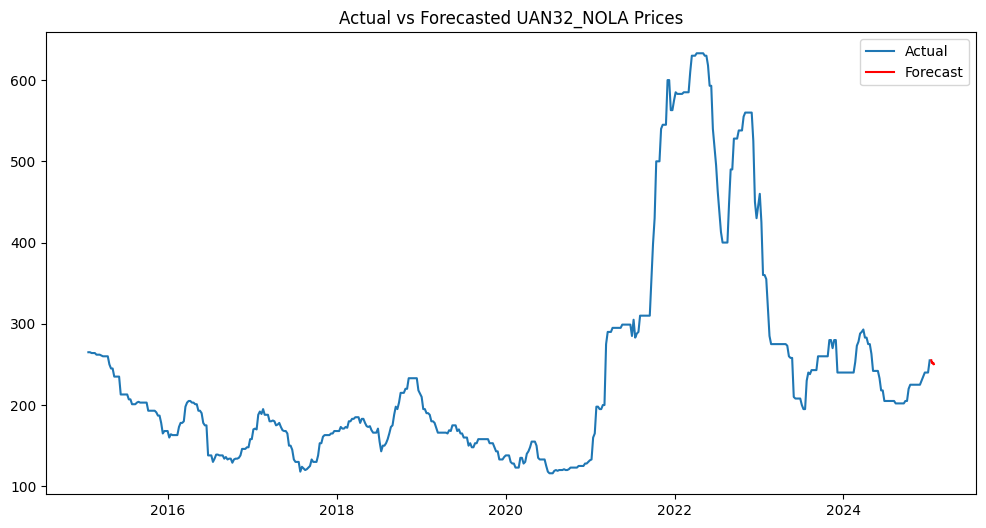

In [ ]:
# prompt: show the forcasted value along with the trained data

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ... (Your existing code for data loading, preprocessing, and model fitting)

# Forecasting the next 12 weeks (assuming future values for X are known)
# Replace placeholders with actual future values
value1 = X['Ammonia_4Week_EMA'].iloc[-1]  # Or a forecast for Ammonia
value2 = X['UAN_BalticSea'].iloc[-1]
value3 = X['Ethanol'].iloc[-1]
value4 = X['Coal'].iloc[-1]
value5 = X['DutchNatGas_4WkMA'].iloc[-1]
value6 = X['Urea_Midwest'].iloc[-1]

future_X = pd.DataFrame({
    'Ammonia_4Week_EMA': [value1] * 12,
    'UAN_BalticSea': [value2] * 12,
    'Ethanol': [value3] * 12,
    'Coal': [value4] * 12,
    'DutchNatGas_4WkMA': [value5] * 12,
    'Urea_Midwest': [value6] * 12,
}, index=pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12))

forecast = model_fit.forecast(steps=12, exog=future_X)
print(f'Forecast for next 12 weeks:\n{forecast}')

# Plot the forecast along with the actual data
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual')
plt.plot(future_X.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted UAN32_NOLA Prices')
plt.legend()
plt.show()

In [ ]:
# prompt: check correlations between variables

import pandas as pd

# Assuming 'X' is your DataFrame of regressors
correlation_matrix = X.corr()
correlation_matrix

,Ammonia_4Week_EMA,UAN_BalticSea,Ethanol,Coal,DutchNatGas_4WkMA,Urea_Midwest
Ammonia_4Week_EMA,1.000000,0.944795,0.773730,0.808677,0.839258,0.893028
UAN_BalticSea,0.944795,1.000000,0.792017,0.856909,0.875425,0.928595
Ethanol,0.773730,0.792017,1.000000,0.738168,0.724905,0.823508
Coal,0.808677,0.856909,0.738168,1.000000,0.914727,0.774971
DutchNatGas_4WkMA,0.839258,0.875425,0.724905,0.914727,1.000000,0.812258
Urea_Midwest,0.893028,0.928595,0.823508,0.774971,0.812258,1.000000


Forecast for next 12 weeks:
2025-01-16    255.137846
2025-01-23    253.328065
2025-01-30    253.205480
2025-02-06    251.944757
2025-02-13    251.678112
2025-02-20    252.250909
2025-02-27    252.208658
2025-03-06    251.022278
2025-03-13    250.824430
2025-03-20    251.460895
2025-03-27    251.477563
2025-04-03    250.345707
Freq: W-THU, Name: predicted_mean, dtype: float64


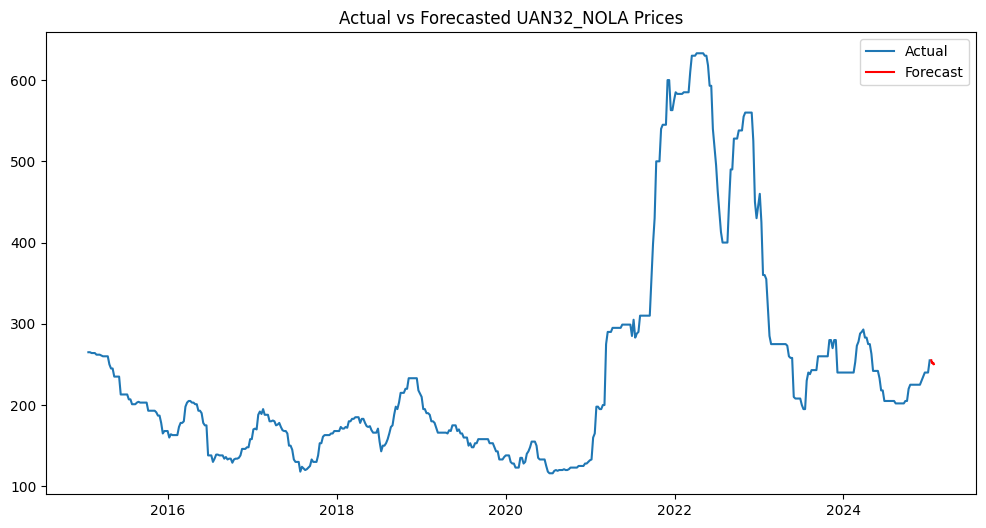

In [ ]:
# prompt: forecast for next 12 weeks

# ... (Your existing code)

# Forecasting the next 12 weeks (assuming future values for X are known)
# Replace placeholders with actual future values or forecasts for the regressors
value1 = X['Ammonia_4Week_EMA'].iloc[-1]  # Or a forecast for Ammonia
value2 = X['UAN_BalticSea'].iloc[-1]
value3 = X['Ethanol'].iloc[-1]
value4 = X['Coal'].iloc[-1]
value5 = X['DutchNatGas_4WkMA'].iloc[-1]
value6 = X['Urea_Midwest'].iloc[-1]

future_X = pd.DataFrame({
    'Ammonia_4Week_EMA': [value1] * 12,
    'UAN_BalticSea': [value2] * 12,
    'Ethanol': [value3] * 12,
    'Coal': [value4] * 12,
    'DutchNatGas_4WkMA': [value5] * 12,
    'Urea_Midwest': [value6] * 12,
}, index=pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12))

forecast = model_fit.forecast(steps=12, exog=future_X)
print(f'Forecast for next 12 weeks:\n{forecast}')

# Plot the forecast along with the actual data
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual')
plt.plot(future_X.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted UAN32_NOLA Prices')
plt.legend()
plt.show()